*@rguptabinary*

# Apple stock analysis and predictions

In [1]:
from notebook import psource

import warnings
warnings.filterwarnings("ignore")

### Following calsses represents various configurations for the model.

In [2]:
from deepstocks.common_configs import RNNConfig, Stock_names, Features

psource(RNNConfig)
psource(Stock_names)
psource(Features)
                                                                  

config = RNNConfig()
config.stock_name = 'apple'

stock_names = Stock_names()
features = Features()

### Date exploration
Below we load the data from csv file by providing a date range and stock name

In [3]:
# set a date range 
import datetime
from deepstocks.data_loader import get_csv_data

start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2015, 1, 1)

df = get_csv_data(stock_names.to_symbol[config.stock_name], start_date, end_date, config.window)

df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2010-01-04 to 2014-12-31
Data columns (total 3 columns):
Adj Close       1258 non-null float64
Volume          1258 non-null float64
Rolling mean    1248 non-null float64
dtypes: float64(3)
memory usage: 79.3 KB


,Adj Close,Volume,Rolling mean
2010-01-04,20.696495,1.000000,NaN
2010-01-05,20.732277,1.219098,NaN
2010-01-06,20.402506,1.118345,NaN
2010-01-07,20.364788,0.966382,NaN
2010-01-08,20.500175,0.906591,NaN
2010-01-11,20.319336,0.936200,NaN
2010-01-12,20.088205,1.204019,NaN
2010-01-13,20.371557,1.227174,NaN
2010-01-14,20.253571,0.876784,NaN
2010-01-15,19.915094,1.203225,NaN


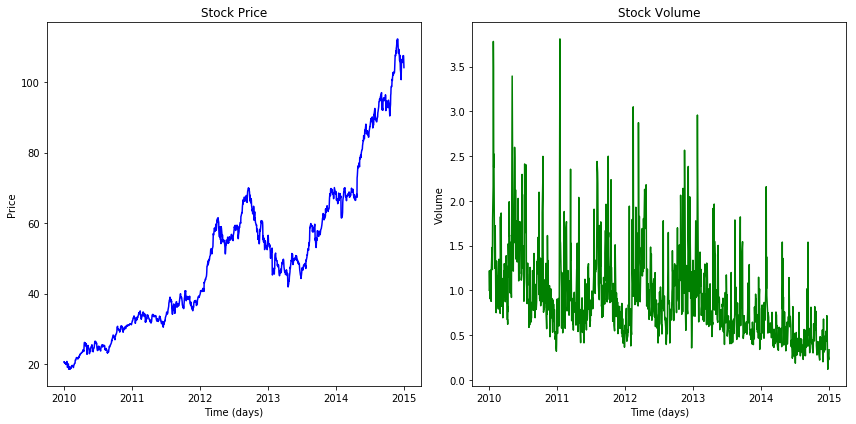

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from deepstocks.visualize import multiple_plots

fig, axes = plt.subplots(figsize=(12,6), nrows=1, ncols=2)

fig_dict = [
    {
        'col':features.adj,
        'color': 'blue',
        'label': features.adj,
        'title': 'Stock Price',
        'xlabel': 'Time (days)',
        'ylabel': 'Price'
    },
    {
        'col':'Volume',
        'color': 'green',
        'label': 'Volume',
        'title': 'Stock Volume',
        'xlabel': 'Time (days)',
        'ylabel': 'Volume'
    }
]

multiple_plots(axes, df, fig_dict)
#fig    
plt.tight_layout()

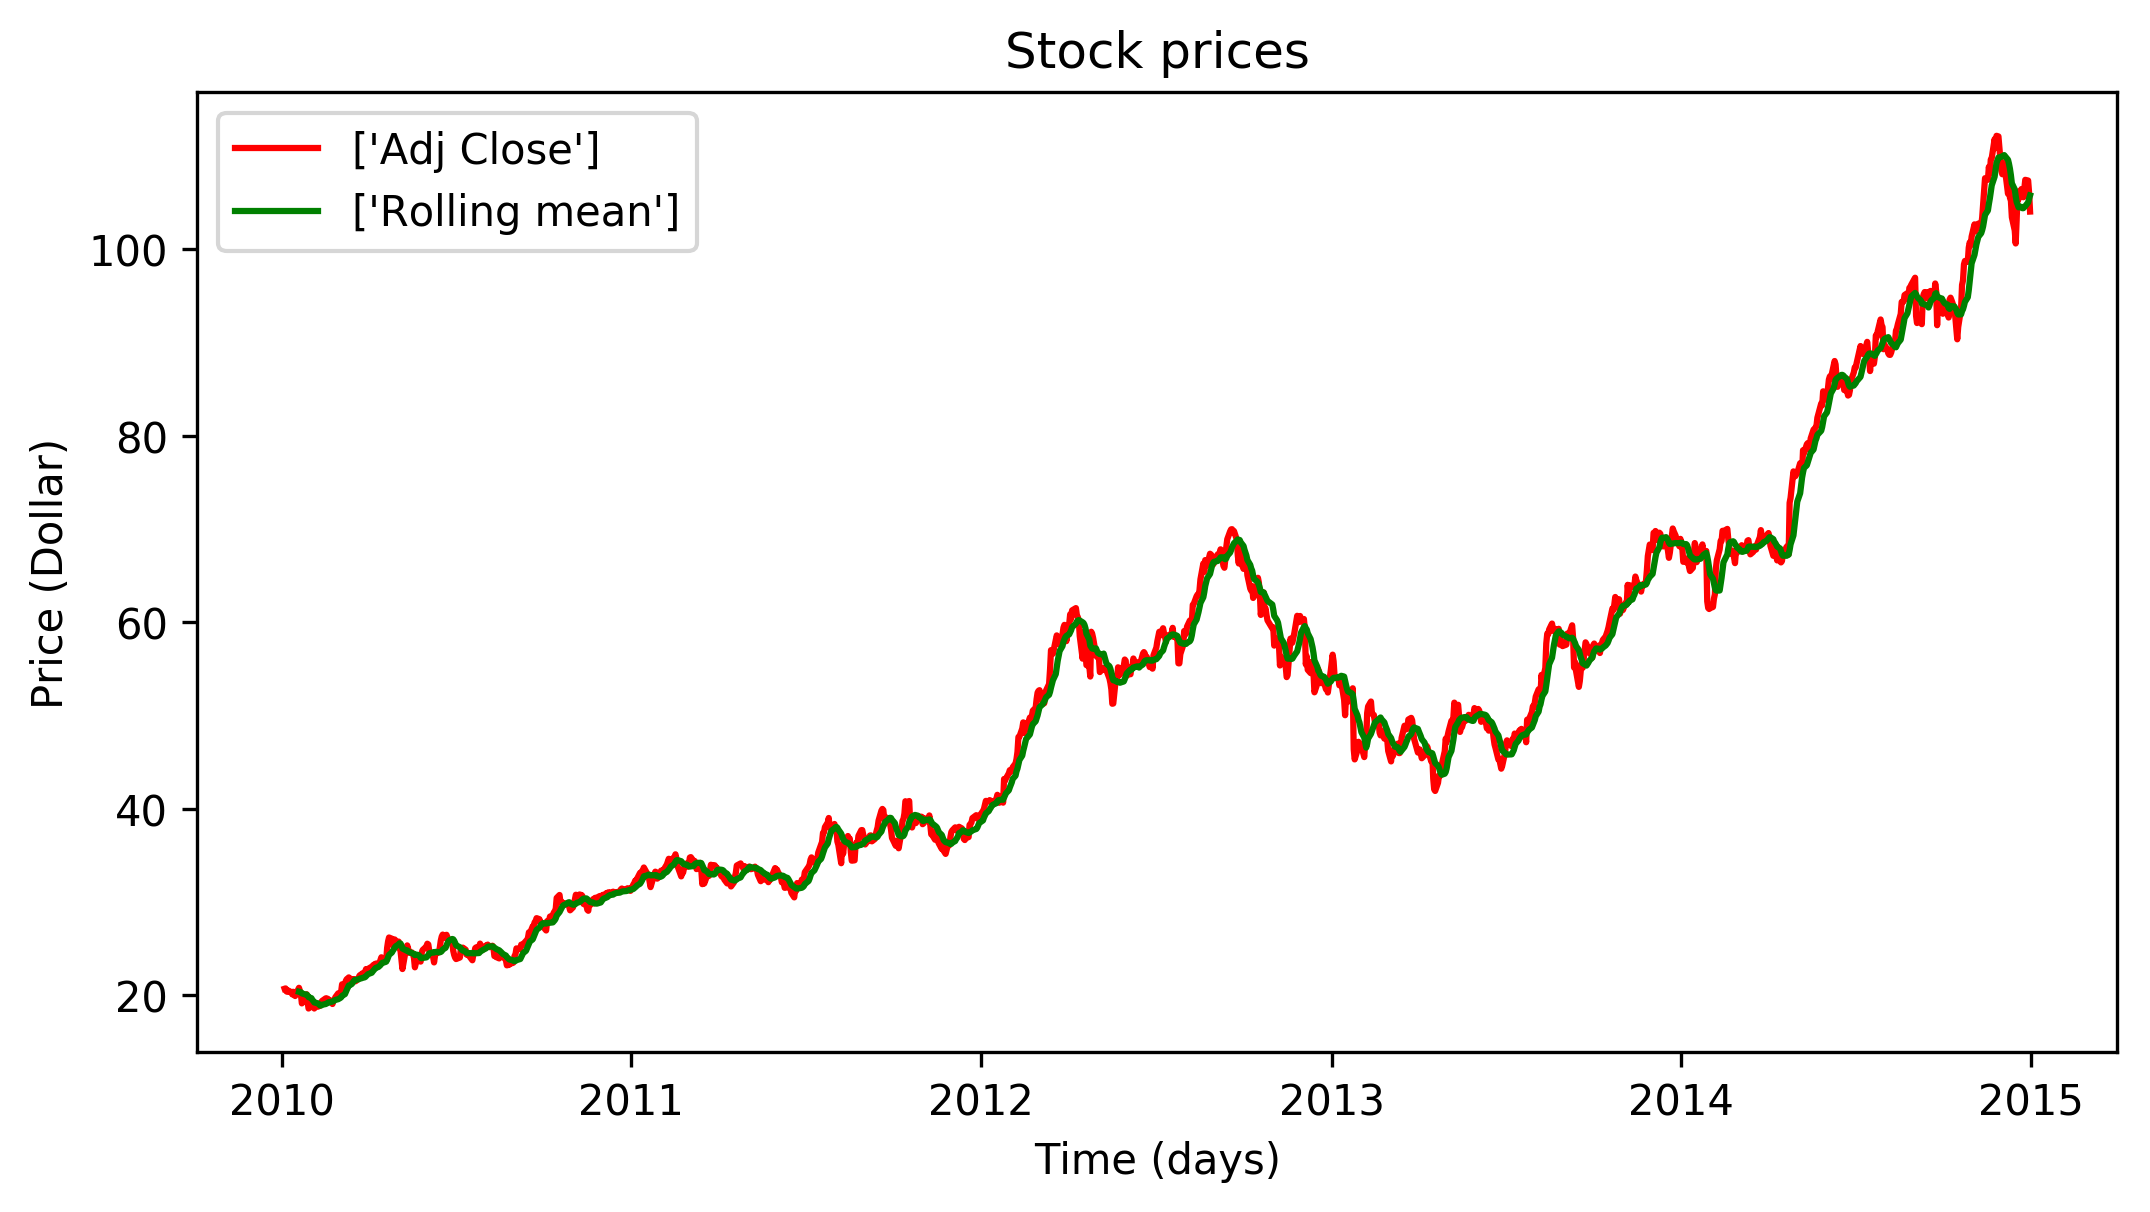

In [5]:
# create a function to plot, with an option of subplots
from deepstocks.visualize import single_figure_plot

plot = plt.figure(figsize=(8,4), dpi=300)
axes = plot.add_axes([0.1, 0.1, 0.8, 0.8])
single_figure_plot(axes, df, cols=[(features.adj, 'red'), (features.rol, 'green')])

#plot.savefig("filename.png")

### Prepare the data

? Importance of normalization

In [6]:
from deepstocks.preprocess import normalize, prepare_data

seq_len = 20
df_stock = df.copy()

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize(df_stock_norm, [features.adj, features.rol], features.rol, config.window)

# create train, test, valid data
x_train, y_train, x_valid, y_valid, x_test, y_test = prepare_data(df_stock_norm, 
                                                                  config.seq_len, 
                                                                  config.valid_ratio, 
                                                                  config.test_ratio)

data = prepare_data(df_stock_norm, config.seq_len, config.valid_ratio, config.test_ratio)

# print a summary
print('df_stock.columns.values : {}\n'.format(df_stock.columns.values))
print('Df shape      : {}'.format( df_stock_norm.shape))
print('x_train shape : {}'.format( x_train.shape))
print('y_train shape : {}'.format( y_train.shape))
print('x_valid shape : {}'.format( x_valid.shape))
print('y_valid shape : {}'.format( y_valid.shape))
print('x_test shape  : {}'.format( x_test.shape))
print('y_test shape  : {}'.format( y_test.shape))

df_stock.columns.values : ['Adj Close' 'Volume' 'Rolling mean']

Df shape      : (1248, 2)
x_train shape : (860, 19, 2)
y_train shape : (860, 2)
x_valid shape : (184, 19, 2)
y_valid shape : (184, 2)
x_test shape  : (184, 19, 2)
y_test shape  : (184, 2)


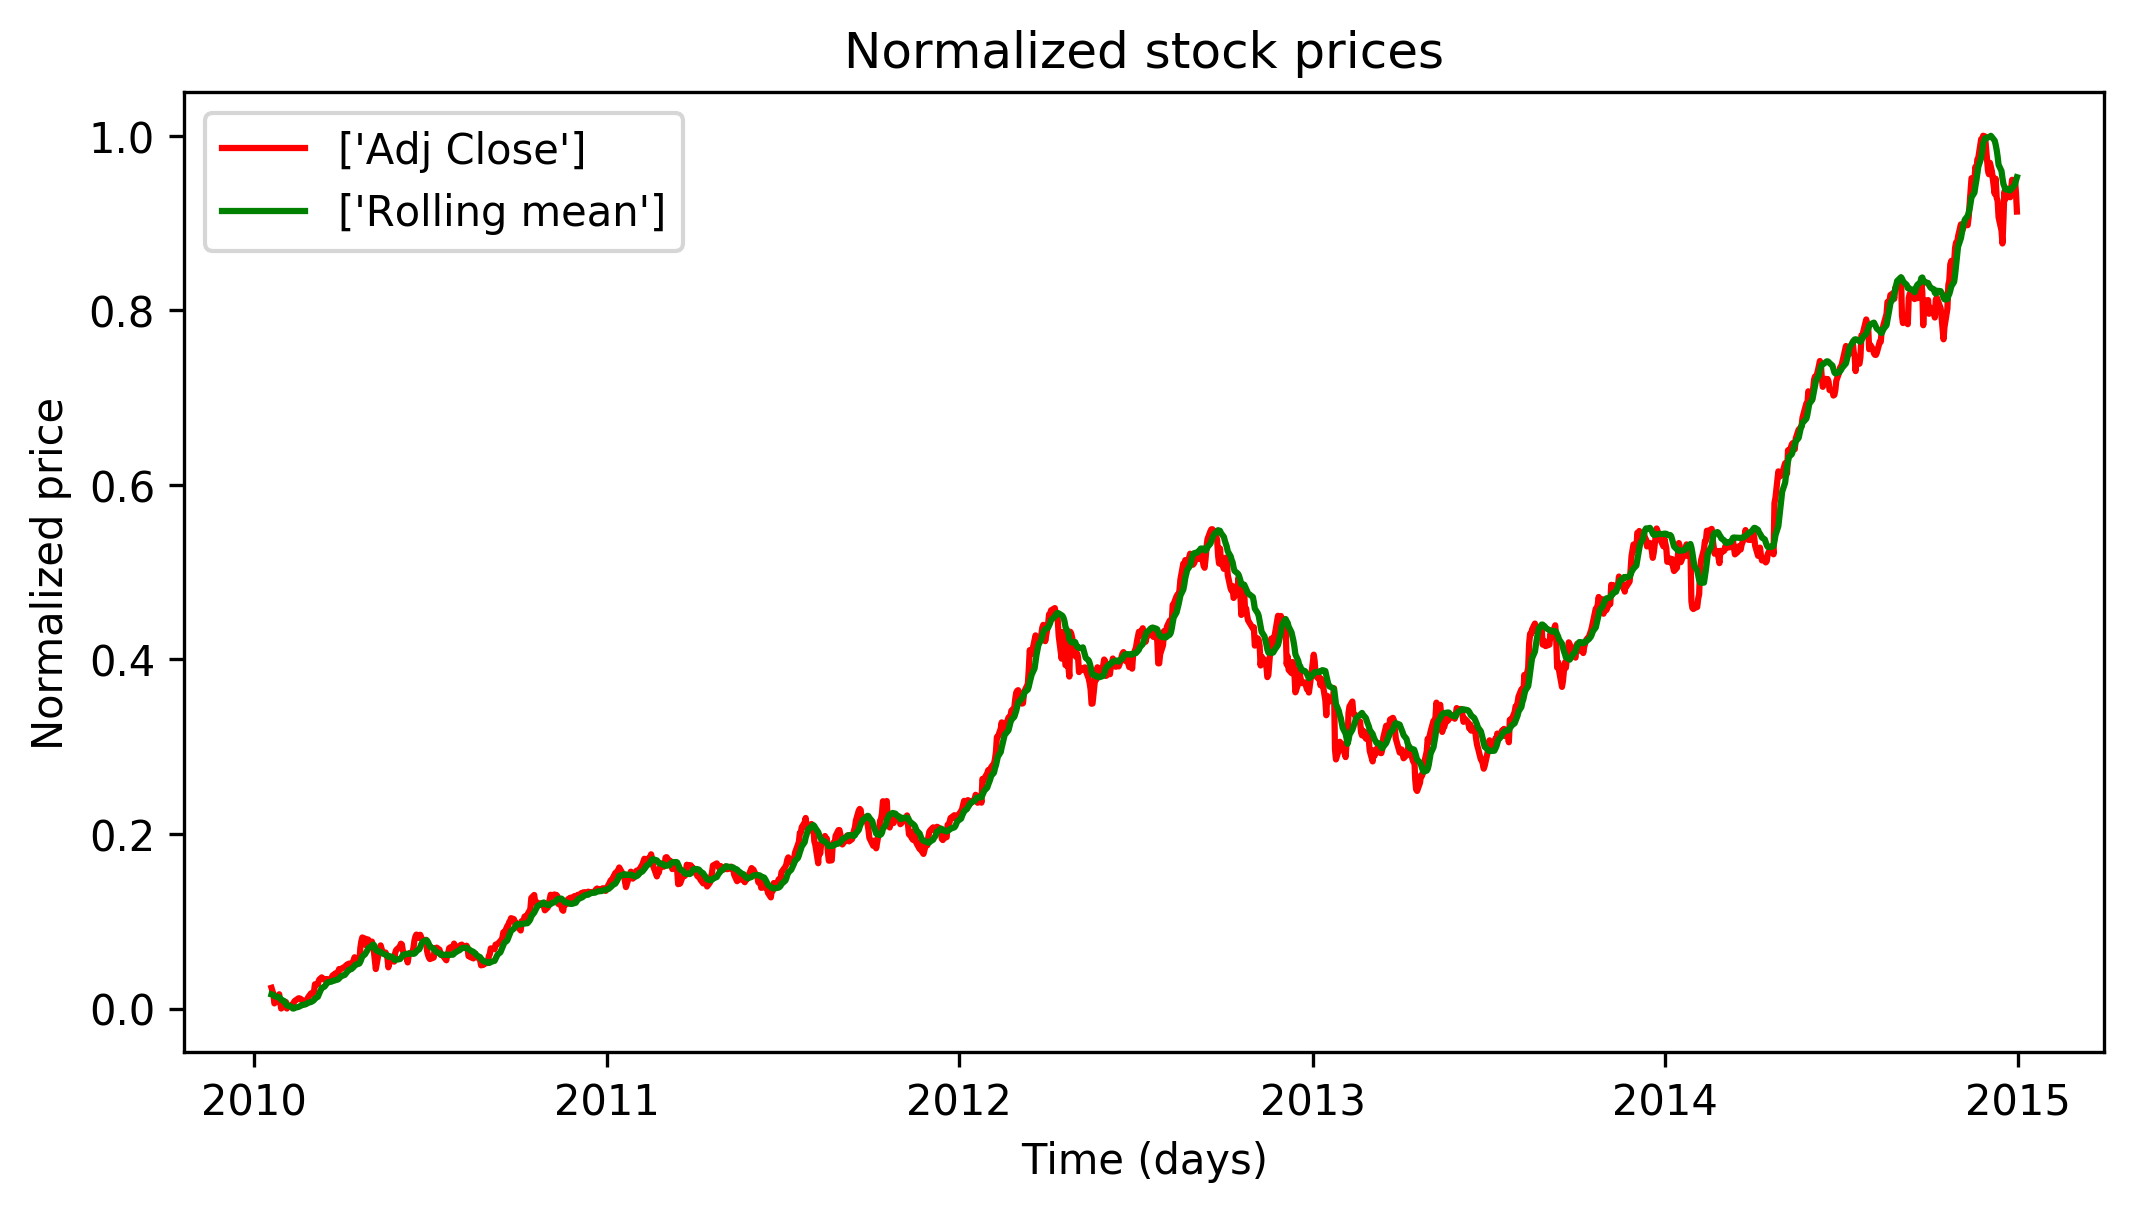

In [7]:
plot_norm = plt.figure(figsize=(8,4), dpi=300)
axes_norm = plot_norm.add_axes([0.1, 0.1, 0.8, 0.8])
single_figure_plot(axes_norm, df_stock_norm, 
                   cols=[(features.adj, 'red'), (features.rol, 'green')], 
                   title= 'Normalized stock prices',
                   ylabel= 'Normalized price'
                  )

In [8]:
from lstm_train import train_rnn
from lstm_test import test_model
from lstm_predict import predict


psource(train_rnn)

In [9]:
psource(predict)

In [10]:
psource(test_model)

In [11]:
train_rnn(config, features, data)
          
    # y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    # y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    # y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 0.062144/0.188315
5.00 epochs: MSE train/valid = 0.001002/0.002582
10.00 epochs: MSE train/valid = 0.001169/0.003514
15.00 epochs: MSE train/valid = 0.000934/0.002512
20.00 epochs: MSE train/valid = 0.000924/0.002425
25.00 epochs: MSE train/valid = 0.000981/0.003038
30.00 epochs: MSE train/valid = 0.000876/0.002138
35.00 epochs: MSE train/valid = 0.000889/0.002281
40.00 epochs: MSE train/valid = 0.000719/0.002199
45.00 epochs: MSE train/valid = 0.000878/0.002547
50.00 epochs: MSE train/valid = 0.000930/0.002502
55.00 epochs: MSE train/valid = 0.000794/0.002738
60.00 epochs: MSE train/valid = 0.000851/0.003027
65.00 epochs: MSE train/valid = 0.001002/0.003034
70.00 epochs: MSE train/valid = 0.001236/0.003576
75.00 epochs: MSE train/valid = 0.001003/0.003585
80.00 epochs: MSE train/valid = 0.001129/0.003495
85.00 epochs: MSE train/valid = 0.001236/0.003863
90.00 epochs: MSE train/valid = 0.001136/0.003430
95.00 epochs: MSE train/valid = 0.001315/0.003846


# Testing accuracy


* data[4] = x_test
* data[5] = y_test

In [12]:
test_model(data[4], data[5], config)

INFO:tensorflow:Restoring parameters from ./checkpoints/forecast_model__apple
Testing Accuracy: 99.99535259179538 %



# Prediction time

* data[0] = x_train
* data[2] = x_valid
* data[4] = x_test


In [13]:
data.append(predict(config, data[0]))
data.append(predict(config, data[4]))
data.append(predict(config, data[2]))

INFO:tensorflow:Restoring parameters from ./checkpoints/forecast_model__apple
INFO:tensorflow:Restoring parameters from ./checkpoints/forecast_model__apple
INFO:tensorflow:Restoring parameters from ./checkpoints/forecast_model__apple


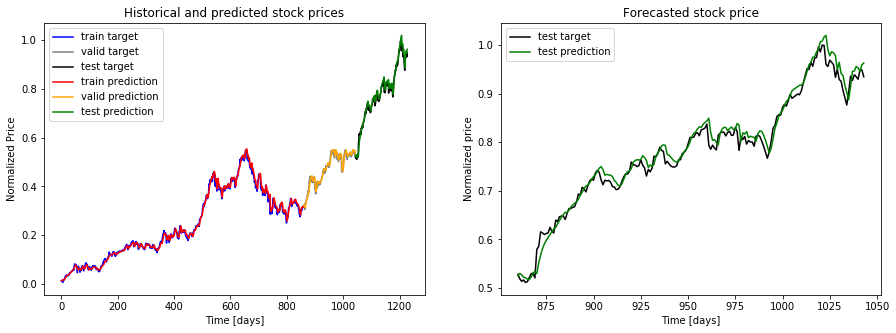

<Figure size 432x288 with 0 Axes>

In [14]:
from deepstocks.visualize import plot_predictions

fig, axes = plt.subplots(figsize=(15,5), nrows=1, ncols=2)
plot_predictions(axes, data)
plt.show()
plt.tight_layout()